# MLC Project - Napster
Group Focus: Data provided from DSPS

Considerations: which DSPs are doing a bad job of sending over complete or at least minimum data required for matching?

Which DSPs have the most streams? Do songs get more air time on certain DSPs?

Does song length correlate to DSP in any way?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

## Read data into notebook

In [2]:
mlc = pd.read_csv('../data/MLC_sample.csv')
mlc.head()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


## Rename columns

In [3]:
mlc.columns = ['ISRC', 'Country_Code', 'Registrant_Code', 'Year_of_Reference', 'Usage_Period', 'DSP', 'Streams', 'Recording_Artist', 'Recording_Label', 'Recording_Title', 'Release_Title', 'Recording_Duration', 'Songwriters_Listed']
mlc.head()

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


## Create column(s) for song length details

In [4]:
def assign_length(row):
    if row <= 120:
        result = "0-2 min"
    elif row <= 300:
        result = "2-5 min"
    elif row <= 420:
        result = "5-7 min"
    elif row <= 600:
        result = "7-10 min"
    elif row <= 3600:
        result = "10-60 min"
    elif row <= 86400:
        result = "1-24 hours"
    else:
        result = "More than 1 day"
    return result

mlc['Song_Length'] = mlc['Recording_Duration'].apply(assign_length)
mlc.head()

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0,2-5 min
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0,2-5 min
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0,2-5 min
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0,10-60 min
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0,2-5 min


In [5]:
def compared_to_median(row):
    if row < 190:
        result = "Lower"
    elif row == 190:
        result = "Median"
    else:
        result = "Higher"
    return result
mlc['Length_Compared_to_Median'] = mlc['Recording_Duration'].apply(compared_to_median)
mlc.head()

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length,Length_Compared_to_Median
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0,2-5 min,Lower
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0,2-5 min,Lower
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0,2-5 min,Lower
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0,10-60 min,Higher
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0,2-5 min,Lower


## Check for null values in each column

In [6]:
mlc.isnull().sum()

ISRC                         1760
Country_Code                 1697
Registrant_Code              1697
Year_of_Reference            1761
Usage_Period                 8102
DSP                          3999
Streams                         0
Recording_Artist                0
Recording_Label              1008
Recording_Title                 0
Release_Title                  69
Recording_Duration              0
Songwriters_Listed              0
Song_Length                     0
Length_Compared_to_Median       0
dtype: int64

## Check data type in each column

In [7]:
mlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ISRC                       98240 non-null   object 
 1   Country_Code               98303 non-null   object 
 2   Registrant_Code            98303 non-null   object 
 3   Year_of_Reference          98239 non-null   float64
 4   Usage_Period               91898 non-null   object 
 5   DSP                        96001 non-null   object 
 6   Streams                    100000 non-null  int64  
 7   Recording_Artist           100000 non-null  object 
 8   Recording_Label            98992 non-null   object 
 9   Recording_Title            100000 non-null  object 
 10  Release_Title              99931 non-null   object 
 11  Recording_Duration         100000 non-null  int64  
 12  Songwriters_Listed         100000 non-null  int64  
 13  Song_Length                100

## Count of DSPs

In [8]:
mlc['DSP'].value_counts()

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: DSP, dtype: int64

In [9]:
DSP_list = mlc['DSP'].unique()
print(DSP_list)

['AudioMack' 'SoundCloud' 'Trebel' 'Spotify' 'Apple' 'Amazon' 'Pandora'
 'YouTube' nan 'Tidal' 'iHeart Radio' 'Melodyv' 'Deezer' 'GTL' 'LiveXLive'
 'NugsNet' 'Midwest Tape' 'Ultimate Guitar' 'Qoboz' 'Anghami' 'Pacemaker'
 'PowerMusic' 'Wolfgangs' 'Recisio' 'Sonos' 'Smithsonian' 'Fan Label'
 'MixCloud' 'MonkingMe' 'Classical Archives']


def main():

for x in DSP_list (or mlc['DSP'])?

Need to either reset the index on the df OR use orginal df based on the DSP column and then run a unique to avoid repeats. That will create the list that can then be used for the for loop.

There are 29 DSPs with at least one stream attributed, but there are 3999 entries in the dataset that have a null value for DSP.

## DSP DataFrames for further analysis

In [10]:
deezer = mlc.loc[mlc['DSP'] == 'Deezer']
deezer.isnull().sum()

ISRC                         0
Country_Code                 0
Registrant_Code              0
Year_of_Reference            0
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              5
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [11]:
anghami = mlc.loc[mlc['DSP'] == 'Anghami']
anghami.isnull().sum()

ISRC                         0
Country_Code                 0
Registrant_Code              0
Year_of_Reference            0
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              3
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [12]:
sonos = mlc.loc[mlc['DSP'] == 'Sonos']
sonos.isnull().sum()

ISRC                         0
Country_Code                 0
Registrant_Code              0
Year_of_Reference            0
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              0
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [13]:
recisio = mlc.loc[mlc['DSP'] == 'Recisio']
recisio.isnull().sum()

ISRC                          0
Country_Code                  0
Registrant_Code               0
Year_of_Reference             0
Usage_Period                  0
DSP                           0
Streams                       0
Recording_Artist              0
Recording_Label              22
Recording_Title               0
Release_Title                 0
Recording_Duration            0
Songwriters_Listed            0
Song_Length                   0
Length_Compared_to_Median     0
dtype: int64

In [14]:
smithsonian = mlc.loc[mlc['DSP'] == 'Smithsonian']
smithsonian.isnull().sum()

ISRC                         1
Country_Code                 1
Registrant_Code              1
Year_of_Reference            1
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              0
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [15]:
ultimate_guitar = mlc.loc[mlc['DSP'] == 'Ultimate Guitar']
ultimate_guitar.isnull().sum()

ISRC                          0
Country_Code                  0
Registrant_Code               0
Year_of_Reference             0
Usage_Period                  0
DSP                           0
Streams                       0
Recording_Artist              0
Recording_Label              19
Recording_Title               0
Release_Title                19
Recording_Duration            0
Songwriters_Listed            0
Song_Length                   0
Length_Compared_to_Median     0
dtype: int64

In [16]:
powermusic = mlc.loc[mlc['DSP'] == 'PowerMusic']
powermusic.isnull().sum()

ISRC                         0
Country_Code                 0
Registrant_Code              0
Year_of_Reference            0
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              8
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [17]:
wolfgangs = mlc.loc[mlc['DSP'] == 'Wolfgangs']
wolfgangs.isnull().sum()

ISRC                         0
Country_Code                 0
Registrant_Code              0
Year_of_Reference            0
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              4
Recording_Title              0
Release_Title                4
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [18]:
fan_label = mlc.loc[mlc['DSP'] == 'Fan Label']
fan_label.isnull().sum()

ISRC                         0
Country_Code                 0
Registrant_Code              0
Year_of_Reference            0
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              0
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [19]:
mixcloud = mlc.loc[mlc['DSP'] == 'MixCloud']
mixcloud.isnull().sum()

ISRC                         0
Country_Code                 0
Registrant_Code              0
Year_of_Reference            0
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              4
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [20]:
pacemaker = mlc.loc[mlc['DSP'] == 'Pacemaker']
pacemaker.isnull().sum()

ISRC                         0
Country_Code                 0
Registrant_Code              0
Year_of_Reference            0
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              0
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [21]:
classical_archives = mlc.loc[mlc['DSP'] == 'Classical Archives']
classical_archives.isnull().sum()

ISRC                         0
Country_Code                 0
Registrant_Code              0
Year_of_Reference            0
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              0
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [22]:
monkingme = mlc.loc[mlc['DSP'] =='MonkingMe']
monkingme.isnull().sum()

ISRC                         0
Country_Code                 0
Registrant_Code              0
Year_of_Reference            0
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              1
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [23]:
unknownDSP = mlc.loc[mlc['DSP'].isna()]
unknownDSP.isnull().sum()

ISRC                           58
Country_Code                   54
Registrant_Code                54
Year_of_Reference              58
Usage_Period                 3999
DSP                          3999
Streams                         0
Recording_Artist                0
Recording_Label                47
Recording_Title                 0
Release_Title                  35
Recording_Duration              0
Songwriters_Listed              0
Song_Length                     0
Length_Compared_to_Median       0
dtype: int64

In [24]:
spotify = mlc.loc[mlc['DSP'] == 'Spotify']
spotify.isnull().sum()

ISRC                         571
Country_Code                 554
Registrant_Code              554
Year_of_Reference            571
Usage_Period                   0
DSP                            0
Streams                        0
Recording_Artist               0
Recording_Label               11
Recording_Title                0
Release_Title                  1
Recording_Duration             0
Songwriters_Listed             0
Song_Length                    0
Length_Compared_to_Median      0
dtype: int64

In [25]:
apple = mlc.loc[mlc['DSP'] == 'Apple']
apple.isnull().sum()

ISRC                          380
Country_Code                  363
Registrant_Code               363
Year_of_Reference             380
Usage_Period                 1441
DSP                             0
Streams                         0
Recording_Artist                0
Recording_Label                 8
Recording_Title                 0
Release_Title                   7
Recording_Duration              0
Songwriters_Listed              0
Song_Length                     0
Length_Compared_to_Median       0
dtype: int64

In [26]:
amazon = mlc.loc[mlc['DSP'] == 'Amazon']
amazon.isnull().sum()

ISRC                         265
Country_Code                 255
Registrant_Code              255
Year_of_Reference            265
Usage_Period                   0
DSP                            0
Streams                        0
Recording_Artist               0
Recording_Label                0
Recording_Title                0
Release_Title                  0
Recording_Duration             0
Songwriters_Listed             0
Song_Length                    0
Length_Compared_to_Median      0
dtype: int64

In [27]:
pandora = mlc.loc[mlc['DSP'] == 'Pandora']
pandora.isnull().sum()

ISRC                         237
Country_Code                 230
Registrant_Code              230
Year_of_Reference            238
Usage_Period                   0
DSP                            0
Streams                        0
Recording_Artist               0
Recording_Label               27
Recording_Title                0
Release_Title                  3
Recording_Duration             0
Songwriters_Listed             0
Song_Length                    0
Length_Compared_to_Median      0
dtype: int64

In [28]:
tidal = mlc.loc[mlc['DSP'] == 'Tidal']
tidal.isnull().sum()

ISRC                          53
Country_Code                  52
Registrant_Code               52
Year_of_Reference             53
Usage_Period                 868
DSP                            0
Streams                        0
Recording_Artist               0
Recording_Label                0
Recording_Title                0
Release_Title                  0
Recording_Duration             0
Songwriters_Listed             0
Song_Length                    0
Length_Compared_to_Median      0
dtype: int64

In [29]:
youtube = mlc.loc[mlc['DSP'] == 'YouTube']
youtube.isnull().sum()

ISRC                          56
Country_Code                  54
Registrant_Code               54
Year_of_Reference             56
Usage_Period                 958
DSP                            0
Streams                        0
Recording_Artist               0
Recording_Label              233
Recording_Title                0
Release_Title                  0
Recording_Duration             0
Songwriters_Listed             0
Song_Length                    0
Length_Compared_to_Median      0
dtype: int64

In [30]:
soundcloud = mlc.loc[mlc['DSP'] == 'SoundCloud']
soundcloud.isnull().sum()

ISRC                          36
Country_Code                  36
Registrant_Code               36
Year_of_Reference             36
Usage_Period                 494
DSP                            0
Streams                        0
Recording_Artist               0
Recording_Label                0
Recording_Title                0
Release_Title                  0
Recording_Duration             0
Songwriters_Listed             0
Song_Length                    0
Length_Compared_to_Median      0
dtype: int64

In [31]:
gtl = mlc.loc[mlc['DSP'] == 'GTL']
gtl.isnull().sum()

ISRC                         26
Country_Code                 24
Registrant_Code              24
Year_of_Reference            26
Usage_Period                  0
DSP                           0
Streams                       0
Recording_Artist              0
Recording_Label               0
Recording_Title               0
Release_Title                 0
Recording_Duration            0
Songwriters_Listed            0
Song_Length                   0
Length_Compared_to_Median     0
dtype: int64

In [32]:
melodyv = mlc.loc[mlc['DSP'] == 'Melodyv']
melodyv.isnull().sum()

ISRC                         15
Country_Code                 15
Registrant_Code              15
Year_of_Reference            15
Usage_Period                  0
DSP                           0
Streams                       0
Recording_Artist              0
Recording_Label               0
Recording_Title               0
Release_Title                 0
Recording_Duration            0
Songwriters_Listed            0
Song_Length                   0
Length_Compared_to_Median     0
dtype: int64

In [33]:
trebel = mlc.loc[mlc['DSP'] == 'Trebel']
trebel.isnull().sum()

ISRC                         19
Country_Code                 18
Registrant_Code              18
Year_of_Reference            19
Usage_Period                  0
DSP                           0
Streams                       0
Recording_Artist              0
Recording_Label               0
Recording_Title               0
Release_Title                 0
Recording_Duration            0
Songwriters_Listed            0
Song_Length                   0
Length_Compared_to_Median     0
dtype: int64

In [34]:
iheartradio = mlc.loc[mlc['DSP'] == 'iHeart Radio']
iheartradio.isnull().sum()

ISRC                         16
Country_Code                 16
Registrant_Code              16
Year_of_Reference            16
Usage_Period                 38
DSP                           0
Streams                       0
Recording_Artist              0
Recording_Label               0
Recording_Title               0
Release_Title                 0
Recording_Duration            0
Songwriters_Listed            0
Song_Length                   0
Length_Compared_to_Median     0
dtype: int64

In [35]:
audiomack = mlc.loc[mlc['DSP'] == 'AudioMack']
audiomack.isnull().sum()

ISRC                          16
Country_Code                  15
Registrant_Code               15
Year_of_Reference             16
Usage_Period                 287
DSP                            0
Streams                        0
Recording_Artist               0
Recording_Label              550
Recording_Title                0
Release_Title                  0
Recording_Duration             0
Songwriters_Listed             0
Song_Length                    0
Length_Compared_to_Median      0
dtype: int64

In [36]:
nugsnet = mlc.loc[mlc['DSP'] == 'NugsNet']
nugsnet.isnull().sum()

ISRC                         4
Country_Code                 3
Registrant_Code              3
Year_of_Reference            4
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              0
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [37]:
livexlive = mlc.loc[mlc['DSP'] == 'LiveXLive']
livexlive.isnull().sum()

ISRC                          4
Country_Code                  4
Registrant_Code               4
Year_of_Reference             4
Usage_Period                 11
DSP                           0
Streams                       0
Recording_Artist              0
Recording_Label              24
Recording_Title               0
Release_Title                 0
Recording_Duration            0
Songwriters_Listed            0
Song_Length                   0
Length_Compared_to_Median     0
dtype: int64

In [38]:
qoboz = mlc.loc[mlc['DSP'] == 'Qoboz']
qoboz.isnull().sum()

ISRC                         0
Country_Code                 0
Registrant_Code              0
Year_of_Reference            0
Usage_Period                 0
DSP                          0
Streams                      0
Recording_Artist             0
Recording_Label              0
Recording_Title              0
Release_Title                0
Recording_Duration           0
Songwriters_Listed           0
Song_Length                  0
Length_Compared_to_Median    0
dtype: int64

In [39]:
midwesttape = mlc.loc[mlc['DSP'] == 'Midwest Tape']
midwesttape.isnull().sum()

ISRC                          3
Country_Code                  3
Registrant_Code               3
Year_of_Reference             3
Usage_Period                  6
DSP                           0
Streams                       0
Recording_Artist              0
Recording_Label              42
Recording_Title               0
Release_Title                 0
Recording_Duration            0
Songwriters_Listed            0
Song_Length                   0
Length_Compared_to_Median     0
dtype: int64

In [94]:
pd.DataFrame(unknownDSP.isnull().sum())

,0
ISRC,58
Country_Code,54
Registrant_Code,54
Year_of_Reference,58
Usage_Period,3999
DSP,3999
Streams,0
Recording_Artist,0
Recording_Label,47
Recording_Title,0


In [41]:
mlc['Recording_Duration'].describe()

count    100000.000000
mean       1016.893690
std       15565.692133
min           0.000000
25%         149.000000
50%         190.000000
75%         236.000000
max      818738.000000
Name: Recording_Duration, dtype: float64

In [42]:
mlc.nlargest(10, ['Recording_Duration'])

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length,Length_Compared_to_Median
19931,QZES81895037,QZ,ES8,18.0,2/1/2021,Trebel,6464,Megan Thee Stallion,Warner,Cry Baby (feat. DaBaby),Good News,818738,0,More than 1 day,Higher
34584,DEN962000842,DE,N96,20.0,2/1/2021,Trebel,4797,SZA,Sony Music,Good Days,Good Days,770091,0,More than 1 day,Higher
20399,JMA272011862,JM,A27,20.0,2/1/2021,Trebel,3492,H.E.R.,Sony Music,Damage,Damage,714437,0,More than 1 day,Higher
48381,USAT22006112,US,AT2,20.0,2/1/2021,Trebel,2965,Kevo Muney,Warner,Leave Some Day,Leave Some Day,463500,0,More than 1 day,Higher
138,USUYG1360358,US,UYG,13.0,4/1/2021,Deezer,2,Unknown,NaN,{Cartagena},Silvestre Dangond - Grandes Éxitos,356461,0,More than 1 day,Higher
139,USUM72105617,US,UM7,21.0,4/1/2021,Deezer,2,Unknown,NaN,{Esa Mujer},Silvestre Dangond - Grandes Éxitos,356461,0,More than 1 day,Higher
140,USAT22007802,US,AT2,20.0,5/1/2021,Deezer,2,Unknown,NaN,{Esa Mujer},Silvestre Dangond - Grandes Éxitos,356461,0,More than 1 day,Higher
141,USUM72024668,US,UM7,20.0,4/1/2021,Deezer,2,Unknown,NaN,"{Me Gusta, Me Gusta}",Silvestre Dangond - Grandes Éxitos,356461,0,More than 1 day,Higher
142,USUG12004700,US,UG1,20.0,4/1/2021,Deezer,2,Unknown,NaN,"{Me Gusta, Me Gusta}",Silvestre Dangond - Grandes Éxitos,356461,0,More than 1 day,Higher
258,QZMGB2100021,QZ,MGB,21.0,3/1/2021,Pandora,160,Bizzy Bone,Bizzy Bone,0.44,The Mantra,356461,1,More than 1 day,Higher


In [43]:
unknownDSP.nlargest(10, ['Recording_Duration'])

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length,Length_Compared_to_Median
2563,USUM72000789,US,UM7,20.0,NaN,NaN,5,Crz,Black Magic Music,A Lo Scarface,C.R.Z,356461,1,More than 1 day,Higher
4607,USUM72024427,US,UM7,20.0,NaN,NaN,6,Sadistik,Clockwork Grey Music,All the Pretty Horses,Elysium,356461,1,More than 1 day,Higher
9062,QZMWW2021140,QZ,MWW,20.0,NaN,NaN,12,The Chimpz,"The Chimpz Worldwide, LLC",Battlegrounds,The Chimpz,356461,0,More than 1 day,Higher
9206,USUYG1300482,US,UYG,13.0,NaN,NaN,109,Thi'sl,"Full Ride Music Group, LLC.",Be King (feat. Laquan Green),Fallen King,356461,0,More than 1 day,Higher
9521,USWD11366389,US,WD1,13.0,NaN,NaN,73,Thi'sl,"Full Ride Music Group, LLC.",Beautiful Mind (feat. Pastor Ad3),Beautiful Monster,356461,0,More than 1 day,Higher
10927,QM4TW2009087,QM,4TW,20.0,NaN,NaN,269,Anthem Lights,Prodigy,Billy Joel Medley: Uptown Girl / Piano Man / S...,Icons: A Tribute to the Greats,356461,1,More than 1 day,Higher
11988,USUM72016329,US,UM7,20.0,NaN,NaN,39,Anthem Lights,Prodigy,Bob Marley Medley: Three Little Birds / One Lo...,Icons: A Tribute to the Greats,356461,1,More than 1 day,Higher
12459,CAX1M1910015,CA,X1M,19.0,NaN,NaN,7,Zayde Wolf,Lyric House LLC,Born Ready,Born Ready,356461,0,More than 1 day,Higher
13427,USN1R2028001,US,N1R,20.0,NaN,NaN,7,Thi'sl,"Full Ride Music Group, LLC.",Broken Crown,Fallen King,356461,0,More than 1 day,Higher
13450,QMCE71302874,QM,CE7,13.0,NaN,NaN,4,Nate Mills,Nate Millyunz LLC,Broken Man,Waves 2,356461,0,More than 1 day,Higher


The longest song in this dataset comes in at 818,738 seconds which is equal to 227.4 hours. 356,461 also shows up in the dataset with more frequency than anticipated. This deserves some additional attention.

In [44]:
(mlc['Recording_Duration'].values == 356461).sum()

161

In [45]:
(unknownDSP['Recording_Duration'].values == 356461).sum()

80

In [46]:
(pandora['Recording_Duration'].values == 356461).sum()

76

In [47]:
(spotify['Recording_Duration'].values == 356461).sum()

0

In [48]:
(apple['Recording_Duration'].values == 356461).sum()

0

In [49]:
(tidal['Recording_Duration'].values == 356461).sum()

0

In [50]:
(amazon['Recording_Duration'].values == 356461).sum()

0

In [51]:
(youtube['Recording_Duration'].values == 356461).sum()

0

In [52]:
(soundcloud['Recording_Duration'].values == 356461).sum()

0

In [53]:
hours_99 = mlc[mlc['Recording_Duration'] == 356461]
hours_99.head(10)

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length,Length_Compared_to_Median
138,USUYG1360358,US,UYG,13.0,4/1/2021,Deezer,2,Unknown,NaN,{Cartagena},Silvestre Dangond - Grandes Éxitos,356461,0,More than 1 day,Higher
139,USUM72105617,US,UM7,21.0,4/1/2021,Deezer,2,Unknown,NaN,{Esa Mujer},Silvestre Dangond - Grandes Éxitos,356461,0,More than 1 day,Higher
140,USAT22007802,US,AT2,20.0,5/1/2021,Deezer,2,Unknown,NaN,{Esa Mujer},Silvestre Dangond - Grandes Éxitos,356461,0,More than 1 day,Higher
141,USUM72024668,US,UM7,20.0,4/1/2021,Deezer,2,Unknown,NaN,"{Me Gusta, Me Gusta}",Silvestre Dangond - Grandes Éxitos,356461,0,More than 1 day,Higher
142,USUG12004700,US,UG1,20.0,4/1/2021,Deezer,2,Unknown,NaN,"{Me Gusta, Me Gusta}",Silvestre Dangond - Grandes Éxitos,356461,0,More than 1 day,Higher
258,QZMGB2100021,QZ,MGB,21.0,3/1/2021,Pandora,160,Bizzy Bone,Bizzy Bone,0.44,The Mantra,356461,1,More than 1 day,Higher
2563,USUM72000789,US,UM7,20.0,NaN,NaN,5,Crz,Black Magic Music,A Lo Scarface,C.R.Z,356461,1,More than 1 day,Higher
4607,USUM72024427,US,UM7,20.0,NaN,NaN,6,Sadistik,Clockwork Grey Music,All the Pretty Horses,Elysium,356461,1,More than 1 day,Higher
7179,USUYG1245285,US,UYG,12.0,3/1/2021,Pandora,119,flipturn,flipturn,august,Citrona,356461,0,More than 1 day,Higher
9062,QZMWW2021140,QZ,MWW,20.0,NaN,NaN,12,The Chimpz,"The Chimpz Worldwide, LLC",Battlegrounds,The Chimpz,356461,0,More than 1 day,Higher


In [54]:
(mlc['Recording_Duration'].values == 0).sum()

25

In [55]:
(unknownDSP['Recording_Duration'].values == 0).sum()

0

In [56]:
(apple['Recording_Duration'].values == 0).sum()

22

In [57]:
(iheartradio['Recording_Duration'].values == 0).sum()

3

In [58]:
mlc.nsmallest(25, ['Recording_Duration'])

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length,Length_Compared_to_Median
14080,USAB02001303,US,AB0,20.0,3/1/2021,Apple,28962,Mac-K the K Baby,OneWay DumbWay,Butterflies,Butterflies - Single,0,1,0-2 min,Lower
14081,GBKQU2111667,GB,KQU,21.0,3/1/2021,Apple,28962,Mac-K the K Baby,OneWay DumbWay,Butterflies,Butterflies - Single,0,1,0-2 min,Lower
14916,AUHS01912771,AU,HS0,19.0,2/1/2021,iHeart Radio,2192,Jelly Roll & Struggle Jennings,Struggle Jelly Roll,Can't Go Home,Waylon & Willie 2,0,0,0-2 min,Lower
33960,USRH12000094,US,RH1,20.0,1/1/2021,Apple,43995,T9ine,Columbia,Go Harder,Go Harder - Single,0,1,0-2 min,Lower
51916,QM24S1705172,QM,24S,17.0,2/1/2021,iHeart Radio,1045,Jelly Roll & Struggle Jennings,Struggle Jelly Roll,Love Won (feat. Shooter Jennings),Waylon & Willie 2,0,0,0-2 min,Lower
56892,USA6B0446310,US,A6B,4.0,3/1/2021,Apple,103842,"RH Music, Eduardo Luzquiños",Eduardo Luzquiños,Motive X Promiscuous,Motive X Promiscuous (Remix) - Single,0,1,0-2 min,Lower
56893,USY251719876,US,Y25,17.0,3/1/2021,Apple,20793,"RH Music, Eduardo Luzquiños",Eduardo Luzquiños,Motive X Promiscuous,Motive X Promiscuous (Remix) - Single,0,1,0-2 min,Lower
56894,USLR50100122,US,LR5,1.0,3/1/2021,Apple,20793,"RH Music, Eduardo Luzquiños",Eduardo Luzquiños,Motive X Promiscuous,Motive X Promiscuous (Remix) - Single,0,1,0-2 min,Lower
81337,USWB12004709,US,WB1,20.0,2/1/2021,iHeart Radio,1582,Thom Rotella,Thom Rotella,Street Talk,Street Talk,0,0,0-2 min,Lower
81634,QZMEN2057850,QZ,MEN,20.0,3/1/2021,Apple,40593,"Wovy, LowkeyLuke, Alejandro Lema",WOVY,Stuntin' On My Ex,Stuntin' On My Ex - Single,0,1,0-2 min,Lower


There are a significant number of entries in the dataset with the recording duration listed as 0 seconds. Will seek additional clarity around these entries.

In [59]:
mlc['Recording_Duration'].value_counts().loc[lambda x : x<60]

327      59
338      56
351      56
349      56
58       55
         ..
3794      1
33633     1
3894      1
15937     1
8755      1
Name: Recording_Duration, Length: 2000, dtype: int64

There are 2000 entries in the dataset with a song length less than 60 seconds.

In [60]:
# mlc['Recording Duration (Seconds)'].value_counts().loc[lambda x : x>60 and x<120]
# moving to a for loop with .apply in order to evaluate multiple conditions in a cleaner format

def assign_length(row):
    if row <= 120:
        result = "Up to 2 min"
    elif row <= 240:
        result = "2-4 min"
    elif row <= 420:
        result = "4-7 min"
    elif row <= 600:
        result = "7-10 min"
    elif row <= 900:
        result = "10-15 min"
    elif row <= 3600:
        result = "15-60 min"
    elif row <= 86400:
        result = "1-24 hours"
    else:
        result = "More than 1 day"
    return result

mlc['Song Length'] = mlc['Recording Duration (Seconds)'].apply(assign_length)
mlc.head()

In [61]:
mlc['Song_Length'].value_counts()

2-5 min            75705
0-2 min            12487
5-7 min             5678
7-10 min            2289
10-60 min           2008
1-24 hours          1636
More than 1 day      197
Name: Song_Length, dtype: int64

def compared_to_median(row):
    if row < 190:
        result = "Lower"
    elif row == 190:
        result = "Median"
    else:
        result = "Higher"
    return result
mlc['Length Compared to Median'] = mlc['Recording Duration (Seconds)'].apply(compared_to_median)
mlc.head()

In [62]:
mlc['Length_Compared_to_Median'].value_counts()

Lower     49891
Higher    49470
Median      639
Name: Length_Compared_to_Median, dtype: int64

In [63]:
mlc['Song_Length'].value_counts()

2-5 min            75705
0-2 min            12487
5-7 min             5678
7-10 min            2289
10-60 min           2008
1-24 hours          1636
More than 1 day      197
Name: Song_Length, dtype: int64

In [64]:
mlc['Song_Length'].describe()

count      100000
unique          7
top       2-5 min
freq        75705
Name: Song_Length, dtype: object

In [65]:
x = mlc.groupby(['DSP', 'Recording_Duration']).agg({'Streams':['sum']})
print(x)

                                Streams
                                    sum
DSP          Recording_Duration        
Amazon       4                    33756
             8                     1123
             9                     1287
             10                   99467
             12                   27247
...                                 ...
iHeart Radio 669                    256
             693                    422
             703                    311
             1550                   129
             3380                    98

[6629 rows x 1 columns]


## Statistical insights

In [66]:
mlc.describe(include='all')

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length,Length_Compared_to_Median
count,98240,98303,98303,98239.000000,91898,96001,1.000000e+05,100000,98992,100000,99931,100000.000000,100000.000000,100000,100000
unique,54621,77,2368,NaN,5,29,NaN,21149,11777,51057,36723,NaN,NaN,7,3
top,TCAEX2053645,US,UM7,NaN,3/1/2021,Spotify,NaN,Various artists,Atlantic Records,Savage,#unknown#,NaN,NaN,2-5 min,Lower
freq,119,41621,6020,NaN,39887,32268,NaN,967,1384,134,231,NaN,NaN,75705,49891
mean,NaN,NaN,NaN,19.671933,NaN,NaN,5.626550e+04,NaN,NaN,NaN,NaN,1016.893690,0.541610,NaN,NaN
std,NaN,NaN,NaN,12.638870,NaN,NaN,2.620276e+05,NaN,NaN,NaN,NaN,15565.692133,0.498268,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,17.000000,NaN,NaN,6.807000e+03,NaN,NaN,NaN,NaN,149.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,19.000000,NaN,NaN,1.677250e+04,NaN,NaN,NaN,NaN,190.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,20.000000,NaN,NaN,3.990300e+04,NaN,NaN,NaN,NaN,236.000000,1.000000,NaN,NaN


## Visualizations & Insights

#sns.swarmplot(x=spotify.Song_Length, y=spotify.Streams)
#plt.title('Spotify: Streams Per Song Length');

plt.bar(spotify.Song_Length, spotify.Streams)
plt.xlabel('Song Length')
plt.ylabel('Quantity')
plt.title('Spotify Song Length Distribution')
plt.xticks(rotation = 70)
plt.show();

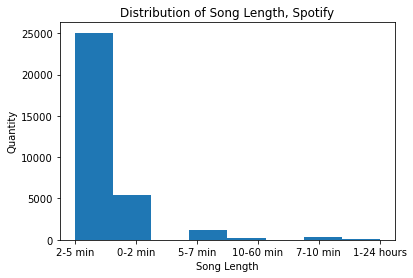

In [67]:
plt.hist(spotify.Song_Length, bins=8)
plt.xlabel('Song Length')
plt.ylabel('Quantity')
plt.title('Distribution of Song Length, Spotify')
plt.show()

In [68]:
top_6_DSP = mlc.loc[mlc['DSP'].isin(['Spotify', 'Apple', 'Amazon', 'Pandora', 'Tidal', ''])]
top_6_DSP.head()

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length,Length_Compared_to_Median
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0,2-5 min,Lower
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,5839,Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1,2-5 min,Higher
7,QMJMT2103634,QM,JMT,21.0,2/1/2021,Amazon,7842,NF,NF Real Music,-Interlude-,The Search,49,0,0-2 min,Lower
8,USRC12100543,US,RC1,21.0,3/1/2021,Spotify,28419,2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1,2-5 min,Lower
9,USAT22007048,US,AT2,20.0,3/1/2021,Spotify,28419,2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1,2-5 min,Lower


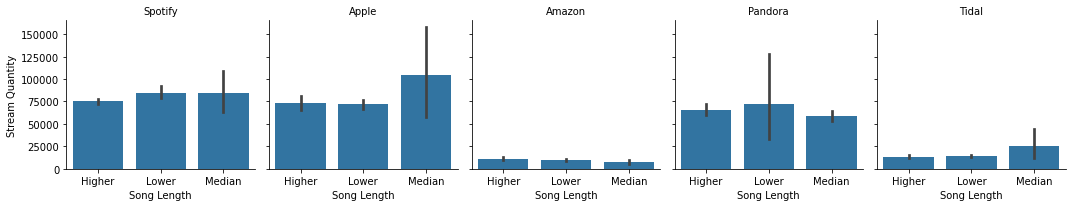

In [69]:
g = sns.FacetGrid(top_6_DSP, col='DSP')
g.map_dataframe(sns.barplot, x='Length_Compared_to_Median', y='Streams')
g.set_axis_labels('Song Length', 'Stream Quantity')
g.set_titles(col_template='{col_name}');

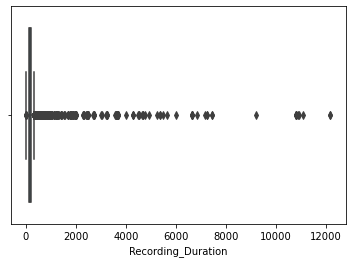

In [70]:
sns.boxplot(x=spotify['Recording_Duration']);
plt.show()

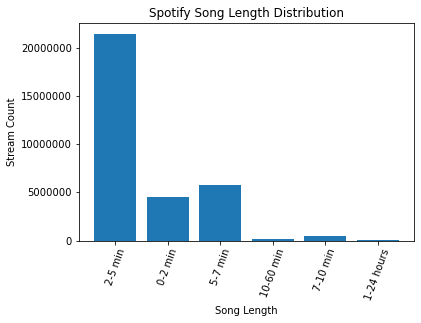

In [71]:
plt.bar(spotify.Song_Length, spotify.Streams) 
plt.xlabel('Song Length') 
plt.ylabel('Stream Count') 
plt.title('Spotify Song Length Distribution') 
plt.xticks(rotation = 70)
plt.ticklabel_format(style='plain', axis='y');
plt.show()

In [ ]:
plt.bar(spotify.Length_Compared_to_Median, spotify.Streams, color='darkgray')
plt.xlabel('Song Length Compared to Median') 
plt.ylabel('Stream Count') 
plt.title('Spotify Song Length Distribution') 
plt.ticklabel_format(style='plain', axis='y');
plt.show()

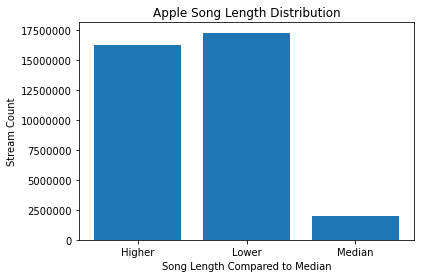

In [73]:
plt.bar(apple.Length_Compared_to_Median, apple.Streams)
plt.xlabel('Song Length Compared to Median') 
plt.ylabel('Stream Count') 
plt.title('Apple Song Length Distribution') 
plt.ticklabel_format(style='plain', axis='y');
plt.show()

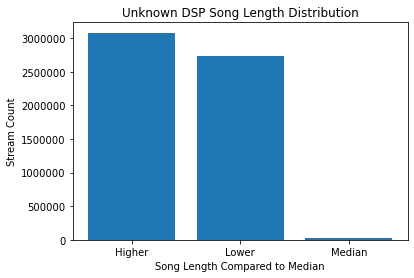

In [74]:
plt.bar(unknownDSP.Length_Compared_to_Median, unknownDSP.Streams)
plt.xlabel('Song Length Compared to Median') 
plt.ylabel('Stream Count') 
plt.title('Unknown DSP Song Length Distribution') 
plt.ticklabel_format(style='plain', axis='y');
plt.show()

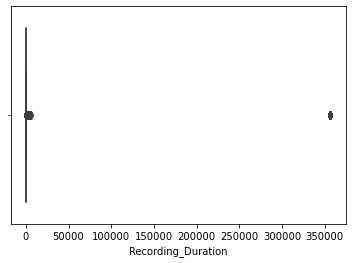

In [75]:
sns.boxplot(x=unknownDSP['Recording_Duration']);
plt.show()

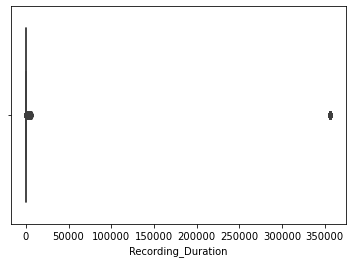

In [76]:
sns.boxplot(x=pandora['Recording_Duration']);
plt.show()

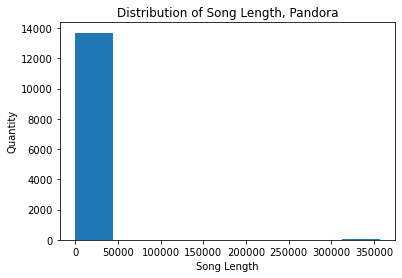

In [77]:
plt.hist(pandora.Recording_Duration, bins=8)
plt.xlabel('Song Length')
plt.ylabel('Quantity')
plt.title('Distribution of Song Length, Pandora')
plt.show()

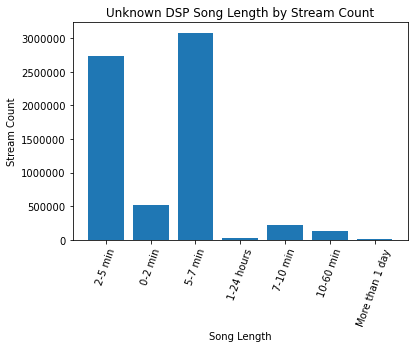

In [78]:
plt.bar(unknownDSP.Song_Length, unknownDSP.Streams)
plt.xlabel('Song Length') 
plt.ylabel('Stream Count') 
plt.title('Unknown DSP Song Length by Stream Count') 
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=70);
plt.show()

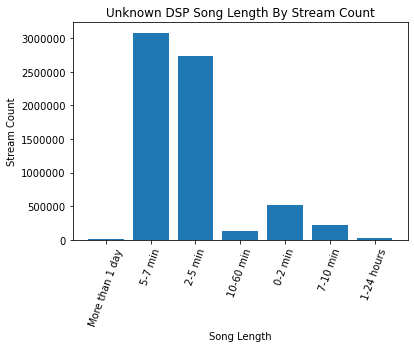

In [97]:
#data = unknownDSP.sort_values('Streams')
plt.bar('Song_Length', 'Streams', data = data)
plt.xticks(rotation = 70)
plt.xlabel('Song Length')
plt.ylabel('Stream Count')
plt.title('Unknown DSP Song Length By Stream Count')
plt.ticklabel_format(style='plain', axis='y');
plt.show()

value counts on Song_Length and then sort that in descending order

In [86]:
data.head(10)

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length,Length_Compared_to_Median
99236,TCAEL1973157,TC,AEL,19.0,NaN,NaN,2,Каста,Respect Production,Сочиняй мечты,Лучшие песни,356461,0,More than 1 day,Higher
75998,QMBZ92075439,QM,BZ9,20.0,NaN,NaN,2,Bobby Steggert|Norbert Leo Butz,Broadway Records,Showdown (feat. Big Fish Original Broadway Cast),Big Fish (Original Broadway Cast Recording),356461,0,More than 1 day,Higher
99198,QZHN72026844,QZ,HN7,20.0,NaN,NaN,2,Каста,Respect Production,Нормально все,Лучшие песни,356461,0,More than 1 day,Higher
99154,QZH5E2108401,QZ,H5E,21.0,NaN,NaN,2,Каста,Respect Production,Ды-ды-дым,Лучшие песни,356461,0,More than 1 day,Higher
99246,SEBGA2001466,SE,BGA,20.0,NaN,NaN,2,Каста,Respect Production,Такое чувство,Лучшие песни,356461,0,More than 1 day,Higher
93438,SEBGA2000271,SE,BGA,20.0,NaN,NaN,2,Snail's House,CachetteNotes.,Walking on Snow,Ordinary Songs 2,356461,0,More than 1 day,Higher
81501,QZK6F2019390,QZ,K6F,20.0,NaN,NaN,2,Vado,Vado,Stronger,Sinatra 2,356461,0,More than 1 day,Higher
50572,DEN961531905,DE,N96,15.0,NaN,NaN,2,Crz,Black Magic Music,Lo Hago Bien,C.R.Z,356461,1,More than 1 day,Higher
99219,QZFYW2140933,QZ,FYW,21.0,NaN,NaN,2,Каста,Respect Production,Самый счастливый человек,Лучшие песни,356461,0,More than 1 day,Higher
99137,QZ8LD1926768,QZ,8LD,19.0,NaN,NaN,3,Каста,Respect Production,Беренцев,Лучшие песни,356461,0,More than 1 day,Higher


In [87]:
data.tail(10)

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length,Length_Compared_to_Median
2201,USAT21601051,US,AT2,16.0,NaN,NaN,270764,J. Cole,"Dreamville, Inc., Under exclusive license to R...",9 5 . s o u t h,The Off-Season,197,0,2-5 min,Higher
61109,USUM71911088,US,UM7,19.0,NaN,NaN,389217,Ilkay Sencan|Yves V,Spinnin' Records,Not So Bad (feat. Emie),Not So Bad (feat. Emie),153,0,2-5 min,Lower
98621,UKMEH2000095,UK,MEH,20.0,NaN,NaN,396225,Yung Bleu Feat. Drake,WMG,You’re Mines Still (feat. Drake),You’re Mines Still (feat. Drake),226,0,2-5 min,Higher
78400,QMAF31500032,QM,AF3,15.0,NaN,NaN,476036,Young Stoner Life & Young Thug & Gunna Feat. D...,WMG,Solid (feat. Drake),Slime Language 2,216,0,2-5 min,Higher
99006,SEBGA2001101,SE,BGA,20.0,NaN,NaN,512951,Nesamcha Band,Routenote,Zemer Evri,One and Only,77,0,0-2 min,Lower
78755,NaN,NaN,NaN,NaN,NaN,NaN,765650,Israel Kamakawiwo'ole,Big Boy Records,Somewhere Over The Rainbow_What A Wonderful World,Facing Future,308,0,5-7 min,Higher
81200,AUHS02013466,AU,HS0,20.0,NaN,NaN,1638686,Migos,Quality Control Music/Motown Records,Straightenin,Straightenin,256,0,2-5 min,Higher
29749,QZFZ32165841,QZ,FZ3,21.0,NaN,NaN,1691982,Edwin Luna y La Trakalosa de Monterrey,Remex Music,Fíjate Que Si,Me Hiciste un Borracho,204,0,2-5 min,Higher
26483,NL1LE1900213,NL,1LE,19.0,NaN,NaN,2738462,Grupo Firme,Music VIP Entertainment Inc,El Tóxico,El Tóxico,179,1,2-5 min,Lower
78752,NLA506700117,NL,A50,67.0,NaN,NaN,3081467,Israel Kamakawiwo'ole,Big Boy Records,Somewhere Over The Rainbow_What A Wonderful World,Facing Future,308,0,5-7 min,Higher


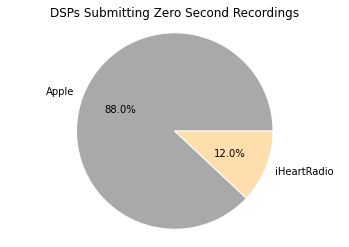

In [116]:
recording_counts = [22, 3]
dsp_labels = 'Apple', 'iHeartRadio'
colors = ['darkgray', 'navajowhite']
plt.pie(recording_counts, labels=dsp_labels, autopct='%1.1f%%', wedgeprops = {'linewidth' : 1, 'edgecolor' : 'white'}, colors=colors)
plt.title('DSPs Submitting Zero Second Recordings')
plt.axis('equal')
plt.savefig('DSPs Submitting Zero Second Recordings.png', transparent=True)
plt.show()

In [81]:
mlc.head()

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length,Length_Compared_to_Median
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0,2-5 min,Lower
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0,2-5 min,Lower
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0,2-5 min,Lower
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0,10-60 min,Higher
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0,2-5 min,Lower


In [85]:
unknownDSP.head(10)

,ISRC,Country_Code,Registrant_Code,Year_of_Reference,Usage_Period,DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Duration,Songwriters_Listed,Song_Length,Length_Compared_to_Median
38,USSM12102187,US,SM1,21.0,NaN,NaN,12296,Miguel,Sony Music,...All,Art Dealer Chic 2,239,0,2-5 min,Higher
116,USUM72024684,US,UM7,20.0,NaN,NaN,2941,Lord Huron,Republic Records,(One Helluva Performer),Long Lost,22,0,0-2 min,Lower
235,QM4TW2169491,QM,4TW,21.0,NaN,NaN,13063,Jon Z,"Chosen Few Emerald Entertainment, Inc.","0 Sentimientos (Remix) [feat. Noriel, Darkiel,...","0 Sentimientos (Remix) [feat. Noriel, Darkiel,...",336,0,5-7 min,Higher
301,USSM12103018,US,SM1,21.0,NaN,NaN,195575,J. Cole|Bas,"Dreamville, Inc., Under exclusive license to R...",1 0 0 . m i l ‘,The Off-Season,163,0,2-5 min,Lower
304,USUM72021193,US,UM7,20.0,NaN,NaN,57058,J. Cole|Bas,"Dreamville, Inc., Under exclusive license to R...",1 0 0 . m i l ‘,The Off-Season,163,0,2-5 min,Lower
306,USSM12100784,US,SM1,21.0,NaN,NaN,18098,J. Cole|Bas,"Dreamville, Inc., Under exclusive license to R...",1 0 0 . m i l ‘,The Off-Season,163,0,2-5 min,Lower
323,USAT22101350,US,AT2,21.0,NaN,NaN,612,Deep Ocean Relax,Calming Nature Recordings,1 Hour Of Cool And Calming Ocean Sounds,1 Hour Of Cool And Calming Ocean Sounds,3614,0,1-24 hours,Higher
451,JPTF02017001,JP,TF0,20.0,NaN,NaN,136,Maverick City Music,NaN,"10,000 Reasons + Spontaneous",NaN,389,1,5-7 min,Higher
564,GBAHS2001165,GB,AHS,20.0,NaN,NaN,1952,Steven Halpern,Steven Halpern's Inner Peace Music,12 Deep Theta 5 Hz (Part 12),Deep Theta: Brainwave Entrainment Music (Revised),340,0,5-7 min,Higher
602,USUG12100612,US,UG1,21.0,NaN,NaN,2471,Paul Hardcastle,Hardcastle Music,13 Forest Echoes (The Conclusion),19 Below Zero,270,0,2-5 min,Higher


In [91]:
unknownDSP['Song_Length'].value_counts()

2-5 min            3011
5-7 min             498
0-2 min             170
7-10 min            150
More than 1 day      80
10-60 min            72
1-24 hours           18
Name: Song_Length, dtype: int64

Convert to dataframe and then plot with respect to counts.

In [95]:
songlength_grouped = pd.DataFrame(unknownDSP['Song_Length'].value_counts())
songlength_grouped.head()

,Song_Length
2-5 min,3011
5-7 min,498
0-2 min,170
7-10 min,150
More than 1 day,80


In [96]:
songlength_grouped = songlength_grouped.rename(columns = {'' : 'Song_Length', 'Song_Length' : 'Count'})
print(songlength_grouped)

                 Count
2-5 min           3011
5-7 min            498
0-2 min            170
7-10 min           150
More than 1 day     80
10-60 min           72
1-24 hours          18


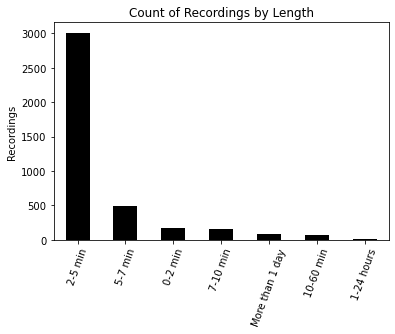

In [108]:
ax = songlength_grouped.plot.bar(y='Count', rot=0, color='black', legend=None)
plt.xticks(rotation=70)
plt.title('Count of Recordings by Length')
plt.ylabel('Recordings')
plt.savefig('Count of Recordings by Length.png', transparent=True)
plt.show()

In [ ]:
#data = unknownDSP.sort_values('Streams')
plt.bar('Song_Length', 'Streams', data = data)
plt.xticks(rotation = 70)
plt.xlabel('Song Length')
plt.ylabel('Stream Count')
plt.title('Unknown DSP Song Length By Stream Count')
plt.ticklabel_format(style='plain', axis='y');
plt.show()